# Overview of Solvers I

## Goal
- Get an overview of various solvers in Ocean
- Understand the main purpose of each solver
- Get familiar with some basic solver parameters

## Abstract Sampler class
- All Ocean samplers inherit from the abstract
- It has the main methods `.sample`, `.sample_ising`, `.sample_qubo`, etc.
- We would like to focus on using `.sample` method with all solvers

In [14]:
from dimod import Sampler

Sampler?

Init signature: Sampler()
Docstring:     
Abstract base class for dimod samplers.

Provides all methods :meth:`~.Sampler.sample`, :meth:`~.Sampler.sample_ising`,
:meth:`~.Sampler.sample_qubo` assuming at least one is implemented.

Also includes utility method :meth:`~.Sampler.remove_unknown_kwargs`, which
may be used in sample methods to handle unknown kwargs.
File:           ~/project/CDL_Training/venv/envs/lib/python3.7/site-packages/dimod-0.10.0.dev4-py3.7-linux-x86_64.egg/dimod/core/sampler.py
Type:           SamplerABCMeta
Subclasses:     ComposedSampler, SpinReversalTransformComposite, StructureComposite, ExactSolver, IdentitySampler, NullSampler, RandomSampler, SimulatedAnnealingSampler, SimulatedAnnealingSampler, DWaveSampler, ...


## Problem
To focus on sampler, we are going to create a simple BQM problem that we will solve using different solvers.

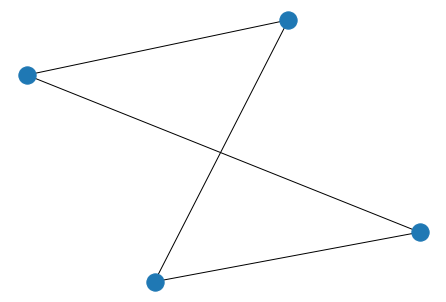

In [28]:
from dimod import BinaryQuadraticModel
bqm = BinaryQuadraticModel('SPIN')
bqm.add_variable(0, -1)
bqm.add_variable(1, -1)
bqm.add_variable(4, -1)
bqm.add_variable(5, -1)
bqm.add_interaction(0, 4, 1.0)
bqm.add_interaction(0, 5, 1.0)
bqm.add_interaction(1, 4, 1.0)
bqm.add_interaction(1, 5, 1.0)

import networkx as nx

nx.draw(bqm.to_networkx_graph())

## ExactSolver
- Mainly for debugging purposes
- Can solve problems with up to 20 variables (or more) depending on the system

In [7]:
from dimod import ExactSolver
from dimod.generators import gnp_random_bqm

solver = ExactSolver()
response = solver.sample(bqm)
print(response.truncate(10))

   0  1  4  5 energy num_oc.
0 +1 +1 -1 -1   -4.0       1
1 -1 -1 +1 +1   -4.0       1
2 +1 +1 +1 -1   -2.0       1
3 +1 -1 +1 +1   -2.0       1
4 -1 +1 +1 +1   -2.0       1
5 +1 +1 -1 +1   -2.0       1
6 -1 +1 +1 -1    0.0       1
7 +1 -1 +1 -1    0.0       1
8 +1 +1 +1 +1    0.0       1
9 -1 +1 -1 +1    0.0       1
['SPIN', 10 rows, 10 samples, 4 variables]


## Simulated Annealing
- Historically was the main benchmark against QPU due to the similar underlying principles
- Can be a good solver/sampler for small problems
- A great tool for debugging purposes
- Can be slow for large, dense problems

In [30]:
from neal import SimulatedAnnealingSampler
from dimod.generators import gnp_random_bqm

sampler = SimulatedAnnealingSampler()

response = sampler.sample(bqm, num_reads=10,
                          num_sweeps=1000,
                          initial_states=None,
                          beta_range=[10, 100])
print(response)

   0  1  4  5 energy num_oc.
0 -1 -1 +1 +1   -4.0       1
1 +1 +1 -1 -1   -4.0       1
2 +1 +1 -1 -1   -4.0       1
3 +1 +1 -1 -1   -4.0       1
4 -1 -1 +1 +1   -4.0       1
5 +1 +1 -1 -1   -4.0       1
6 +1 +1 -1 -1   -4.0       1
7 -1 -1 +1 +1   -4.0       1
8 +1 +1 -1 -1   -4.0       1
9 +1 +1 -1 -1   -4.0       1
['SPIN', 10 rows, 10 samples, 4 variables]


In [33]:
sampler.sample?

Signature:
sampler.sample(
    bqm,
    beta_range=None,
    num_reads=None,
    num_sweeps=1000,
    beta_schedule_type='geometric',
    seed=None,
    interrupt_function=None,
    initial_states=None,
    initial_states_generator='random',
    **kwargs,
)
Docstring:
Sample from a binary quadratic model using an implemented sample method.

Args:
    bqm (:class:`dimod.BinaryQuadraticModel`):
        The binary quadratic model to be sampled.

    beta_range (tuple, optional):
        A 2-tuple defining the beginning and end of the beta schedule, where beta is the
        inverse temperature. The schedule is applied linearly in beta. Default range is set
        based on the total bias associated with each node.

    num_reads (int, optional, default=len(initial_states) or 1):
        Number of reads. Each read is generated by one run of the simulated
        annealing algorithm. If `num_reads` is not explicitly given, it is
        selected to match the number of initial states given. 

In [34]:
from dwave.system import DWaveSampler

sampler = DWaveSampler()

response = sampler.sample(
    bqm, num_reads=10,
    annealing_time=10,
    auto_scale=False,
    answer_mode='raw'
    )
print(response)

   0  1  4  5 energy num_oc.
0 +1 +1 -1 -1   -4.0       1
1 +1 +1 -1 -1   -4.0       1
2 +1 +1 -1 -1   -4.0       1
3 +1 +1 -1 -1   -4.0       1
4 +1 +1 -1 -1   -4.0       1
5 -1 -1 +1 +1   -4.0       1
6 +1 +1 -1 -1   -4.0       1
7 -1 -1 +1 +1   -4.0       1
8 +1 +1 -1 -1   -4.0       1
9 +1 +1 -1 -1   -4.0       1
['SPIN', 10 rows, 10 samples, 4 variables]


In [35]:
sampler.sample?

Signature: sampler.sample(bqm, warnings=None, **kwargs)
Docstring:
Sample from the specified binary quadratic model.

Args:
    bqm (:class:`~dimod.BinaryQuadraticModel`):
        The binary quadratic model. Must match :attr:`.nodelist` and
        :attr:`.edgelist`.

    warnings (:class:`~dwave.system.warnings.WarningAction`, optional):
        Defines what warning action to take, if any. See
        :ref:`warnings_system`. The default behaviour is to
        ignore warnings.

    **kwargs:
        Optional keyword arguments for the sampling method, specified per solver in
        :attr:`.parameters`. D-Wave System Documentation's
        `solver guide <https://docs.dwavesys.com/docs/latest/doc_solver_ref.html>`_
        describes the parameters and properties supported on the D-Wave system.

Returns:
    :class:`dimod.SampleSet`: A `dimod` :obj:`~dimod.SampleSet` object.
    In it this sampler also provides timing information in the `info`
    field as described in the D-Wave System

## Some important parameters of the QPU
- num_reads=10
- annealing_time=10
- auto_scale: True or False

## LeapHybridSampler
- The most flexible solver 
- Can solve large, dense problems efficiently using classical and quantum resources
- 20000 variable fully connected (~200M biases)
- 1000000000 variables with at most 200M biases
- Only one parameter - time limit

In [ ]:
from dwave.system import LeapHybridSampler
from dimod.generators import gnp_random_bqm

bqm = gnp_random_bqm(16, p=0.75, vartype='SPIN')
sampler = LeapHybridSampler()
print(sampler.properties)

response = sampler.sample(
    bqm, time_limit=10,
    )
print(response)